In [1]:
# Import required packages
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
# Import the dataset
file = "NYPD_Arrest_Data__Year_to_Date.csv"
df =  pd.read_csv(file)

In [3]:
# Read the dataset
df.head()

,ARREST_KEY,ARREST_DATE,PD_CD,PD_DESC,KY_CD,OFNS_DESC,LAW_CODE,LAW_CAT_CD,ARREST_BORO,ARREST_PRECINCT,JURISDICTION_CODE,AGE_GROUP,PERP_SEX,PERP_RACE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,New Georeferenced Column
0,263187871,02/07/2023,105.0,STRANGULATION 1ST,106.0,FELONY ASSAULT,PL 1211200,F,S,120,0,25-44,M,BLACK,951637,171141,40.636362,-74.117505,POINT (-74.117505 40.636362)
1,261368273,01/04/2023,NaN,(null),NaN,(null),RPA0076801,M,M,34,0,25-44,F,BLACK,1004287,251338,40.856519,-73.927564,POINT (-73.927564 40.856519)
2,261667175,01/10/2023,101.0,ASSAULT 3,344.0,ASSAULT 3 & RELATED OFFENSES,PL 1200001,M,B,42,0,18-24,F,WHITE HISPANIC,1008754,238895,40.822355,-73.911463,POINT (-73.911463 40.822355)
3,264298625,02/27/2023,NaN,(null),NaN,(null),PL 2224000,F,Q,113,0,25-44,M,BLACK,1039225,181937,40.665881,-73.801837,POINT (-73.80183654 40.66588105)
4,261516485,01/07/2023,397.0,"ROBBERY,OPEN AREA UNCLASSIFIED",105.0,ROBBERY,PL 1601001,F,M,18,0,<18,M,BLACK,988210,218129,40.765390,-73.985702,POINT (-73.985702 40.76539)


In [4]:
df.tail()

,ARREST_KEY,ARREST_DATE,PD_CD,PD_DESC,KY_CD,OFNS_DESC,LAW_CODE,LAW_CAT_CD,ARREST_BORO,ARREST_PRECINCT,JURISDICTION_CODE,AGE_GROUP,PERP_SEX,PERP_RACE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,New Georeferenced Column
54571,265375648,03/20/2023,105.0,STRANGULATION 1ST,106.0,FELONY ASSAULT,PL 1211200,F,Q,113,0,25-44,M,ASIAN / PACIFIC ISLANDER,1046399,187126,40.680077,-73.775929,POINT (-73.775929 40.680077)
54572,265375611,03/20/2023,113.0,"MENACING,UNCLASSIFIED",344.0,ASSAULT 3 & RELATED OFFENSES,PL 1201401,M,M,33,0,18-24,M,WHITE HISPANIC,1000542,244360,40.837374,-73.941122,POINT (-73.941122 40.837374)
54573,265027445,03/13/2023,439.0,"LARCENY,GRAND FROM OPEN AREAS, UNATTENDED",109.0,GRAND LARCENY,PL 1553001,F,Q,113,0,18-24,M,WHITE,1046399,187126,40.680077,-73.775929,POINT (-73.775929 40.680077)
54574,265277526,03/17/2023,101.0,ASSAULT 3,344.0,ASSAULT 3 & RELATED OFFENSES,PL 1200001,M,Q,112,0,65+,M,ASIAN / PACIFIC ISLANDER,1024734,197982,40.709999,-73.853973,POINT (-73.853973 40.709999)
54575,265989716,03/31/2023,792.0,CRIMINAL POSSESSION WEAPON,118.0,DANGEROUS WEAPONS,PL 2650303,F,Q,114,11,25-44,M,WHITE,1006898,220358,40.771479,-73.918233,POINT (-73.91823339 40.7714791)


In [5]:
# Check all available columns
df.columns

Index(['ARREST_KEY', 'ARREST_DATE', 'PD_CD', 'PD_DESC', 'KY_CD', 'OFNS_DESC',
       'LAW_CODE', 'LAW_CAT_CD', 'ARREST_BORO', 'ARREST_PRECINCT',
       'JURISDICTION_CODE', 'AGE_GROUP', 'PERP_SEX', 'PERP_RACE', 'X_COORD_CD',
       'Y_COORD_CD', 'Latitude', 'Longitude', 'New Georeferenced Column'],
      dtype='object')

In [6]:
# Columns and their description for reference
# ARREST_KEY: Randomly generated persistent ID for each arrest
# ARREST_DATE: Exact date of arrest for the reported event
# PD_CD:  Three digit internal classification code (more granular than key code)
# PD_DESC: Description of internal classification corresponding with PD code (more granular than offense description)
# KY_CD: Three digit internal classification code (more general category than PD Code)
# OFNS_DESC: Description of internal classification with KY code (more general category than PD Description)
# LAW_CODE: Law code charges corresponding to NYS Penal law, VTL and other various local laws
# LAW_CAT_CD: Level of offense: felony, misdemeanor, violation
# ARREST_PRECINCT: Precinct where the arrest occured
# JURISDICTION_CODE: Jurisdiction responsible for arrest. Jurisdiction codes 0(patrol),1(Transit) and 2(Housing) represents NYPD
# whilst codes 3 and more represnt non NYPD jurisdictions
# AGE_GROUP:Perpetratots age within a category
# PERP_SEX:Perpetrators age description
# PERP_RACE:Perpetrators race description
# X_COORD_CD:Midblock X-coordinate for New York State Plane Coordinate System, Long Island Zone, NAD 83, units feet (FIPS 3104)
# Y_COORD_CD:Midblock Y-coordinate for New York State Plane Coordinate System, Long Island Zone, NAD 83, units feet (FIPS 3104)
# Latitude:Latitude coordinate for Global Coordinate System, WGS 1984, decimal degrees (EPSG 4326)
# Longitude:Longitude coordinate for Global Coordinate System, WGS 1984, decimal degrees (EPSG 4326)
# geocoded_column: 


In [7]:
# check for nulls
df['ARREST_KEY'].isnull().sum()

0

In [8]:
df['ARREST_DATE'].isnull().sum()

0

In [9]:
# null values are present in PD_CD column
df['PD_CD'].isnull().sum()

251

In [10]:
df['PD_DESC'].isnull().sum()

0

In [11]:
# null values are present in KY_CD column
df['KY_CD'].isnull().sum()

251

In [12]:
df['OFNS_DESC'].isnull().sum()

0

In [13]:
df['LAW_CODE'].isnull().sum()

0

In [14]:
df['ARREST_BORO'].isnull().sum()

0

In [15]:
# null values are present in LAW_CAT_CD column
df['LAW_CAT_CD'].isnull().sum()

420

In [16]:
df['LAW_CAT_CD'].unique()

array(['F', 'M', '9', nan, 'V', 'I'], dtype=object)

In [17]:
df['ARREST_PRECINCT'].isnull().sum()

0

In [18]:
df['JURISDICTION_CODE'].isnull().sum()

0

In [19]:
df['AGE_GROUP'].isnull().sum()

0

In [20]:
df['PERP_SEX'].isnull().sum()

0

In [21]:
df['PERP_RACE'].isnull().sum()

0

In [22]:
df['X_COORD_CD'].isnull().sum()

0

In [23]:
df['Y_COORD_CD'].isnull().sum()

0

In [24]:
df['Latitude'].isnull().sum()

0

In [25]:
df['Longitude'].isnull().sum()

0

In [26]:
# After analyzing all columns, the columns PD_CD,KY_CD and LAW_CAT_CD have null values. Dropping the standardized null values in
# dataset

df1 = df.dropna()

In [27]:
df1.head()

,ARREST_KEY,ARREST_DATE,PD_CD,PD_DESC,KY_CD,OFNS_DESC,LAW_CODE,LAW_CAT_CD,ARREST_BORO,ARREST_PRECINCT,JURISDICTION_CODE,AGE_GROUP,PERP_SEX,PERP_RACE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,New Georeferenced Column
0,263187871,02/07/2023,105.0,STRANGULATION 1ST,106.0,FELONY ASSAULT,PL 1211200,F,S,120,0,25-44,M,BLACK,951637,171141,40.636362,-74.117505,POINT (-74.117505 40.636362)
2,261667175,01/10/2023,101.0,ASSAULT 3,344.0,ASSAULT 3 & RELATED OFFENSES,PL 1200001,M,B,42,0,18-24,F,WHITE HISPANIC,1008754,238895,40.822355,-73.911463,POINT (-73.911463 40.822355)
4,261516485,01/07/2023,397.0,"ROBBERY,OPEN AREA UNCLASSIFIED",105.0,ROBBERY,PL 1601001,F,M,18,0,<18,M,BLACK,988210,218129,40.765390,-73.985702,POINT (-73.985702 40.76539)
5,261273897,01/03/2023,101.0,ASSAULT 3,344.0,ASSAULT 3 & RELATED OFFENSES,PL 1200001,M,M,13,0,25-44,F,BLACK,989179,205835,40.731646,-73.982214,POINT (-73.982214 40.731646)
6,261487453,01/06/2023,244.0,"BURGLARY,UNCLASSIFIED,UNKNOWN",107.0,BURGLARY,PL 1402000,F,Q,103,0,45-64,F,BLACK,1042249,193186,40.696739,-73.790838,POINT (-73.790838 40.696739)


In [28]:
df1.tail()

,ARREST_KEY,ARREST_DATE,PD_CD,PD_DESC,KY_CD,OFNS_DESC,LAW_CODE,LAW_CAT_CD,ARREST_BORO,ARREST_PRECINCT,JURISDICTION_CODE,AGE_GROUP,PERP_SEX,PERP_RACE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,New Georeferenced Column
54571,265375648,03/20/2023,105.0,STRANGULATION 1ST,106.0,FELONY ASSAULT,PL 1211200,F,Q,113,0,25-44,M,ASIAN / PACIFIC ISLANDER,1046399,187126,40.680077,-73.775929,POINT (-73.775929 40.680077)
54572,265375611,03/20/2023,113.0,"MENACING,UNCLASSIFIED",344.0,ASSAULT 3 & RELATED OFFENSES,PL 1201401,M,M,33,0,18-24,M,WHITE HISPANIC,1000542,244360,40.837374,-73.941122,POINT (-73.941122 40.837374)
54573,265027445,03/13/2023,439.0,"LARCENY,GRAND FROM OPEN AREAS, UNATTENDED",109.0,GRAND LARCENY,PL 1553001,F,Q,113,0,18-24,M,WHITE,1046399,187126,40.680077,-73.775929,POINT (-73.775929 40.680077)
54574,265277526,03/17/2023,101.0,ASSAULT 3,344.0,ASSAULT 3 & RELATED OFFENSES,PL 1200001,M,Q,112,0,65+,M,ASIAN / PACIFIC ISLANDER,1024734,197982,40.709999,-73.853973,POINT (-73.853973 40.709999)
54575,265989716,03/31/2023,792.0,CRIMINAL POSSESSION WEAPON,118.0,DANGEROUS WEAPONS,PL 2650303,F,Q,114,11,25-44,M,WHITE,1006898,220358,40.771479,-73.918233,POINT (-73.91823339 40.7714791)


In [29]:
# Check unique Borough values

df1['ARREST_BORO'].unique()

array(['S', 'B', 'M', 'Q', 'K'], dtype=object)

In [30]:
# Replace ARREST_BORO with non abbreviated text

df1['ARREST_BORO'] =  df1['ARREST_BORO'].str.replace('Q','Queens')

<ipython-input-30-e976c1056dff>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['ARREST_BORO'] =  df1['ARREST_BORO'].str.replace('Q','Queens')


In [31]:
df1.head()

,ARREST_KEY,ARREST_DATE,PD_CD,PD_DESC,KY_CD,OFNS_DESC,LAW_CODE,LAW_CAT_CD,ARREST_BORO,ARREST_PRECINCT,JURISDICTION_CODE,AGE_GROUP,PERP_SEX,PERP_RACE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,New Georeferenced Column
0,263187871,02/07/2023,105.0,STRANGULATION 1ST,106.0,FELONY ASSAULT,PL 1211200,F,S,120,0,25-44,M,BLACK,951637,171141,40.636362,-74.117505,POINT (-74.117505 40.636362)
2,261667175,01/10/2023,101.0,ASSAULT 3,344.0,ASSAULT 3 & RELATED OFFENSES,PL 1200001,M,B,42,0,18-24,F,WHITE HISPANIC,1008754,238895,40.822355,-73.911463,POINT (-73.911463 40.822355)
4,261516485,01/07/2023,397.0,"ROBBERY,OPEN AREA UNCLASSIFIED",105.0,ROBBERY,PL 1601001,F,M,18,0,<18,M,BLACK,988210,218129,40.765390,-73.985702,POINT (-73.985702 40.76539)
5,261273897,01/03/2023,101.0,ASSAULT 3,344.0,ASSAULT 3 & RELATED OFFENSES,PL 1200001,M,M,13,0,25-44,F,BLACK,989179,205835,40.731646,-73.982214,POINT (-73.982214 40.731646)
6,261487453,01/06/2023,244.0,"BURGLARY,UNCLASSIFIED,UNKNOWN",107.0,BURGLARY,PL 1402000,F,Queens,103,0,45-64,F,BLACK,1042249,193186,40.696739,-73.790838,POINT (-73.790838 40.696739)


In [32]:
# Replace with different method, using loc

df1.loc[df1['ARREST_BORO'] == 'S','ARREST_BORO'] = 'Staten Island'
df1.loc[df1['ARREST_BORO'] == 'M', 'ARREST_BORO'] = 'Manhattan'
df1.loc[df1['ARREST_BORO'] == 'K', 'ARREST_BORO'] = 'Brooklyn'
df1.loc[df1['ARREST_BORO'] == 'B','ARREST_BORO'] = 'Bronx'


C:\Anaconda3\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


In [33]:
df1.head()

,ARREST_KEY,ARREST_DATE,PD_CD,PD_DESC,KY_CD,OFNS_DESC,LAW_CODE,LAW_CAT_CD,ARREST_BORO,ARREST_PRECINCT,JURISDICTION_CODE,AGE_GROUP,PERP_SEX,PERP_RACE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,New Georeferenced Column
0,263187871,02/07/2023,105.0,STRANGULATION 1ST,106.0,FELONY ASSAULT,PL 1211200,F,Staten Island,120,0,25-44,M,BLACK,951637,171141,40.636362,-74.117505,POINT (-74.117505 40.636362)
2,261667175,01/10/2023,101.0,ASSAULT 3,344.0,ASSAULT 3 & RELATED OFFENSES,PL 1200001,M,Bronx,42,0,18-24,F,WHITE HISPANIC,1008754,238895,40.822355,-73.911463,POINT (-73.911463 40.822355)
4,261516485,01/07/2023,397.0,"ROBBERY,OPEN AREA UNCLASSIFIED",105.0,ROBBERY,PL 1601001,F,Manhattan,18,0,<18,M,BLACK,988210,218129,40.765390,-73.985702,POINT (-73.985702 40.76539)
5,261273897,01/03/2023,101.0,ASSAULT 3,344.0,ASSAULT 3 & RELATED OFFENSES,PL 1200001,M,Manhattan,13,0,25-44,F,BLACK,989179,205835,40.731646,-73.982214,POINT (-73.982214 40.731646)
6,261487453,01/06/2023,244.0,"BURGLARY,UNCLASSIFIED,UNKNOWN",107.0,BURGLARY,PL 1402000,F,Queens,103,0,45-64,F,BLACK,1042249,193186,40.696739,-73.790838,POINT (-73.790838 40.696739)


In [34]:
# Group by Borough for highest crime per Borough

df2 = df1.groupby(['ARREST_BORO'])['ARREST_KEY'].count().sort_values(ascending=False)

<AxesSubplot:xlabel='ARREST_BORO'>

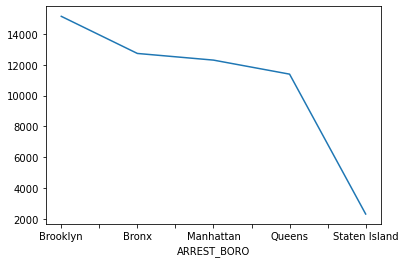

In [35]:
df2.plot()

In [36]:
# Brooklyn has highest no of Crimes recorded

In [37]:
df3 = df1.groupby(['OFNS_DESC'])['ARREST_KEY'].count().sort_values(ascending=False)

In [38]:
# ASSAULT 3 & RELATED OFFENSES is the highest crime type recorded among all 5 Boroughs
df3

OFNS_DESC
ASSAULT 3 & RELATED OFFENSES            7888
PETIT LARCENY                           5868
FELONY ASSAULT                          4948
DANGEROUS DRUGS                         3623
VEHICLE AND TRAFFIC LAWS                3563
MISCELLANEOUS PENAL LAW                 3466
CRIMINAL MISCHIEF & RELATED OF          2663
ROBBERY                                 2659
GRAND LARCENY                           2407
DANGEROUS WEAPONS                       2208
BURGLARY                                1686
OFFENSES AGAINST PUBLIC ADMINI          1476
OFFENSES INVOLVING FRAUD                1308
OTHER OFFENSES RELATED TO THEF          1208
SEX CRIMES                              1175
OFF. AGNST PUB ORD SENSBLTY &           1038
FORGERY                                  944
POSSESSION OF STOLEN PROPERTY            892
INTOXICATED & IMPAIRED DRIVING           634
OTHER TRAFFIC INFRACTION                 599
CRIMINAL TRESPASS                        533
MURDER & NON-NEGL. MANSLAUGHTE           440


In [39]:
# Lets create a new data frame with top 5 crimes to group by ARREST_BORO

df4 = df1.loc[(df1['OFNS_DESC'] == 'ASSAULT 3 & RELATED OFFENSES') | (df1['OFNS_DESC'] == 'PETIT LARCENY')| (df1['OFNS_DESC'] == 'FELONY ASSAULT')| (df1['OFNS_DESC'] == 'DANGEROUS DRUGS') | (df1['OFNS_DESC'] == 'VEHICLE AND TRAFFIC LAWS')]


In [40]:
# Check for unique values
df4['OFNS_DESC'].unique()

array(['FELONY ASSAULT', 'ASSAULT 3 & RELATED OFFENSES', 'PETIT LARCENY',
       'VEHICLE AND TRAFFIC LAWS', 'DANGEROUS DRUGS'], dtype=object)

In [41]:
df5 = df4.groupby(['OFNS_DESC','ARREST_BORO'])['ARREST_KEY'].count().sort_values(ascending=False)

In [42]:
df5

OFNS_DESC                     ARREST_BORO  
ASSAULT 3 & RELATED OFFENSES  Bronx            2212
                              Brooklyn         2106
PETIT LARCENY                 Manhattan        2003
ASSAULT 3 & RELATED OFFENSES  Queens           1756
                              Manhattan        1530
FELONY ASSAULT                Brooklyn         1393
PETIT LARCENY                 Brooklyn         1338
FELONY ASSAULT                Bronx            1287
PETIT LARCENY                 Bronx            1185
DANGEROUS DRUGS               Manhattan        1185
VEHICLE AND TRAFFIC LAWS      Brooklyn         1140
FELONY ASSAULT                Queens           1139
PETIT LARCENY                 Queens           1102
DANGEROUS DRUGS               Brooklyn          966
FELONY ASSAULT                Manhattan         925
VEHICLE AND TRAFFIC LAWS      Bronx             901
                              Queens            841
DANGEROUS DRUGS               Bronx             791
                    

<AxesSubplot:xlabel='OFNS_DESC,ARREST_BORO'>

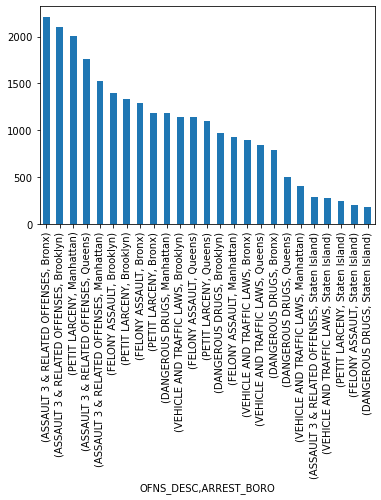

In [43]:
df5.plot(kind='bar')
# ASSAULT 3 & RELATED OFFENSES being the most general category type of Crime recorded among the boroughs Bronx, Brooklyn, Queens 
# and Staten Island

In [58]:
# Create new data frame to filter more specific categories of crime that fall under 'ASSAULT 3 & RELATED OFFENSES'
df6 = df4.loc[df4['OFNS_DESC'] == 'ASSAULT 3 & RELATED OFFENSES']


In [59]:
df6

,ARREST_KEY,ARREST_DATE,PD_CD,PD_DESC,KY_CD,OFNS_DESC,LAW_CODE,LAW_CAT_CD,ARREST_BORO,ARREST_PRECINCT,JURISDICTION_CODE,AGE_GROUP,PERP_SEX,PERP_RACE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,New Georeferenced Column
2,261667175,01/10/2023,101.0,ASSAULT 3,344.0,ASSAULT 3 & RELATED OFFENSES,PL 1200001,M,Bronx,42,0,18-24,F,WHITE HISPANIC,1008754,238895,40.822355,-73.911463,POINT (-73.911463 40.822355)
5,261273897,01/03/2023,101.0,ASSAULT 3,344.0,ASSAULT 3 & RELATED OFFENSES,PL 1200001,M,Manhattan,13,0,25-44,F,BLACK,989179,205835,40.731646,-73.982214,POINT (-73.982214 40.731646)
7,262291240,01/21/2023,101.0,ASSAULT 3,344.0,ASSAULT 3 & RELATED OFFENSES,PL 1200001,M,Brooklyn,75,0,25-44,M,BLACK,1016237,180818,40.662924,-73.884702,POINT (-73.884702 40.662924)
8,261927480,01/14/2023,101.0,ASSAULT 3,344.0,ASSAULT 3 & RELATED OFFENSES,PL 1200001,M,Brooklyn,67,0,25-44,M,BLACK,1006227,178986,40.657926,-73.920790,POINT (-73.92079 40.657926)
12,263076926,02/05/2023,101.0,ASSAULT 3,344.0,ASSAULT 3 & RELATED OFFENSES,PL 1200001,M,Bronx,42,0,25-44,F,BLACK,1010515,245443,40.840323,-73.905074,POINT (-73.905074 40.840323)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54554,265340993,03/19/2023,114.0,OBSTR BREATH/CIRCUL,344.0,ASSAULT 3 & RELATED OFFENSES,PL 1211100,M,Queens,100,0,25-44,M,BLACK,1036548,153376,40.587506,-73.811705,POINT (-73.811705 40.587506)
54562,265891025,03/30/2023,101.0,ASSAULT 3,344.0,ASSAULT 3 & RELATED OFFENSES,PL 1200001,M,Bronx,42,0,18-24,M,BLACK,1009417,240071,40.825581,-73.909065,POINT (-73.909065 40.825581)
54567,265546491,03/23/2023,114.0,OBSTR BREATH/CIRCUL,344.0,ASSAULT 3 & RELATED OFFENSES,PL 1211100,M,Brooklyn,63,0,25-44,M,BLACK,1006047,171107,40.636301,-73.921462,POINT (-73.921462 40.636301)
54572,265375611,03/20/2023,113.0,"MENACING,UNCLASSIFIED",344.0,ASSAULT 3 & RELATED OFFENSES,PL 1201401,M,Manhattan,33,0,18-24,M,WHITE HISPANIC,1000542,244360,40.837374,-73.941122,POINT (-73.941122 40.837374)


In [60]:
df7 = df6.groupby(['PD_DESC','ARREST_BORO'])['ARREST_KEY'].count().sort_values(ascending=False)

In [61]:
# Assault 3 is the highest crime among Boroughs Bronx, Brooklyn, Queens and Manhattan
df7

PD_DESC                ARREST_BORO  
ASSAULT 3              Bronx            1537
                       Brooklyn         1498
                       Queens           1301
                       Manhattan        1167
MENACING,UNCLASSIFIED  Bronx             418
                       Brooklyn          390
                       Queens            293
OBSTR BREATH/CIRCUL    Bronx             257
MENACING,UNCLASSIFIED  Manhattan         241
OBSTR BREATH/CIRCUL    Brooklyn          218
ASSAULT 3              Staten Island     205
OBSTR BREATH/CIRCUL    Queens            162
                       Manhattan         122
                       Staten Island      40
MENACING,UNCLASSIFIED  Staten Island      39
Name: ARREST_KEY, dtype: int64

In [70]:
df8 = df4.groupby(['PERP_RACE','OFNS_DESC'])['ARREST_KEY'].count().sort_values(ascending=False)

In [71]:
df8

PERP_RACE                       OFNS_DESC                   
BLACK                           ASSAULT 3 & RELATED OFFENSES    3825
                                PETIT LARCENY                   2659
                                FELONY ASSAULT                  2440
WHITE HISPANIC                  ASSAULT 3 & RELATED OFFENSES    2086
BLACK                           VEHICLE AND TRAFFIC LAWS        1813
                                DANGEROUS DRUGS                 1697
WHITE HISPANIC                  PETIT LARCENY                   1532
                                FELONY ASSAULT                  1288
WHITE                           PETIT LARCENY                    976
WHITE HISPANIC                  DANGEROUS DRUGS                  941
                                VEHICLE AND TRAFFIC LAWS         867
BLACK HISPANIC                  ASSAULT 3 & RELATED OFFENSES     717
WHITE                           ASSAULT 3 & RELATED OFFENSES     679
ASIAN / PACIFIC ISLANDER        ASSAULT 3 

In [ ]:
# Conclusion: # ASSAULT 3 & RELATED OFFENSES being the most general category type of Crime recorded among the boroughs Bronx, Brooklyn, Queens 
# and Staten Island.